<a href="https://colab.research.google.com/github/Mario2712/CycleGAN/blob/master/CycleGAN_20200520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Re-Connect

In [3]:
#Prevent random disconnects
import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


## Prüfen auf GPU

In [4]:
!nvidia-smi

Mon May 25 05:32:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Mount Google Drive


In [1]:
#Mount Google Drive as folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp '/content/drive/My Drive/nopool2pool_256.npz' '/content'

In [0]:
def copy_to_colab(path, count):
  path = "/content"
  %cd $path
  count_str = '%06d' % count
  copy_cmd = "/content/drive/My\ Drive/g_model_AtoB_"+count_str+".h5 "+path
  !cp $copy_cmd

  copy_cmd = "/content/drive/My\ Drive/g_model_BtoA_"+count_str+".h5 "+path
  !cp $copy_cmd

In [0]:
copy_to_colab("/content", 805)

In [0]:
def copy_to_drive(path, count):
  path = "/content"
  %cd $path
  count_str = '%06d' % count
  copy_cmd = "g_model_AtoB_"+count_str+".h5 /content/drive/My\ Drive/"
  !cp $copy_cmd

  copy_cmd = "g_model_BtoA_"+count_str+".h5 /content/drive/My\ Drive/"
  !cp $copy_cmd

## Import Data

In [0]:
# example of preparing the horses and zebra ddataset
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed

# load all images in a directory into memory
def load_images(path, size=(256,256)):
  data_list = list()
  # enumerate filenames in directory, assume all are images
  for filename in listdir(path):
    # load and resize the image
    pixels = load_img(path + filename, target_size=size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # store
    data_list.append(pixels)
  return asarray(data_list)

# dataset path
path = '/content/nopool2pool/'
# load dataset A
dataA1 = load_images(path + 'trainA/')
dataAB = load_images(path + 'testA/')
dataA = vstack((dataA1, dataAB))
print('Loaded dataA: ', dataA.shape)
# load dataset B
dataB1 = load_images(path + 'trainB/')
dataB2 = load_images(path + 'testB/')
dataB = vstack((dataB1, dataB2))
print('Loaded dataB: ', dataB.shape)
# save as compressed numpy array
filename = 'nopool2pool_256.npz'
savez_compressed(filename, dataA, dataB)
print('Saved dataset: ', filename)

Loaded dataA:  (805, 256, 256, 3)
Loaded dataB:  (36, 256, 256, 3)
Saved dataset:  nopool2pool_256.npz


## Load Dataset / Show

Loaded:  (805, 256, 256, 3) (36, 256, 256, 3)


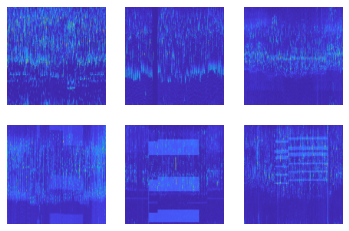

In [0]:
# load and plot the prepared dataset
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('nopool2pool_256.npz')
dataA, dataB = data['arr_0'], data['arr_1']
print('Loaded: ', dataA.shape, dataB.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
  pyplot.subplot(2, n_samples, 1 + i)
  pyplot.axis('off')
  pyplot.imshow(dataA[i].astype('uint8'))
# plot target image
for i in range(n_samples):
  pyplot.subplot(2, n_samples, 1 + n_samples + i)
  pyplot.axis('off')
  pyplot.imshow(dataB[i].astype('uint8'))
pyplot.show()

## Keras-Contrib

In [7]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-5uz7574m
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-5uz7574m
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=260601a12d0d9d0ee912b595fbb0d27f7651deef1d25048e5cb43098d46dc710
  Stored in directory: /tmp/pip-ephem-wheel-cache-lb0ye91v/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


## Discriminator

In [0]:
# define the discriminator model
def define_discriminator(image_shape):
  # weight initialization
  init = RandomNormal(stddev=0.02)
  # source image input
  in_image = Input(shape=image_shape)
  # C64
  d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
  d = LeakyReLU(alpha=0.2)(d)
  # C128
  d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
  d = InstanceNormalization(axis=-1)(d)
  d = LeakyReLU(alpha=0.2)(d)
  # C256
  d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
  d = InstanceNormalization(axis=-1)(d)
  d = LeakyReLU(alpha=0.2)(d)
  # C512
  d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
  d = InstanceNormalization(axis=-1)(d)
  d = LeakyReLU(alpha=0.2)(d)
  # second last output layer
  d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
  d = InstanceNormalization(axis=-1)(d)
  d = LeakyReLU(alpha=0.2)(d)
  # patch output
  patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
  # define model
  model = Model(in_image, patch_out)
  # compile model
  model.compile(loss='mse', optimizer=Adam(lr=0.00005, beta_1=0.5), loss_weights=[0.5])
  return model

## Generator

In [0]:
# generator a resnet block
def resnet_block(n_filters, input_layer):
  # weight initialization
  init = RandomNormal(stddev=0.02)
  # first layer convolutional layer
  g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
  g = InstanceNormalization(axis=-1)(g)
  g = Activation('relu')(g)
  # second convolutional layer
  g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
  g = InstanceNormalization(axis=-1)(g)
  # concatenate merge channel-wise with input layer
  g = Concatenate()([g, input_layer])
  return g

In [0]:
# define the standalone generator model
def define_generator(image_shape, n_resnet=9):
  # weight initialization
  init = RandomNormal(stddev=0.02)
  # image input
  in_image = Input(shape=image_shape)
  # c7s1-64
  g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
  g = InstanceNormalization(axis=-1)(g)
  g = Activation('relu')(g)
  # d128
  g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
  g = InstanceNormalization(axis=-1)(g)
  g = Activation('relu')(g)
  # d256
  g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
  g = InstanceNormalization(axis=-1)(g)
  g = Activation('relu')(g)
  # R256
  for _ in range(n_resnet):
    g = resnet_block(256, g)
  # u128
  g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
  g = InstanceNormalization(axis=-1)(g)
  g = Activation('relu')(g)
  # u64
  g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
  g = InstanceNormalization(axis=-1)(g)
  g = Activation('relu')(g)
  # c7s1-3
  g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
  g = InstanceNormalization(axis=-1)(g)
  out_image = Activation('tanh')(g)
  # define model
  model = Model(in_image, out_image)
  return model

## Composite Model

In [0]:
# define a composite model for updating generators by adversarial and cycle loss
def define_composite_model(g_model_1, d_model, g_model_2, image_shape):
  # ensure the model we're updating is trainable
  g_model_1.trainable = True
  # mark discriminator as not trainable
  d_model.trainable = False
  # mark other generator model as not trainable
  g_model_2.trainable = False
  # discriminator element
  input_gen = Input(shape=image_shape)
  gen1_out = g_model_1(input_gen)
  output_d = d_model(gen1_out)
  # identity element
  input_id = Input(shape=image_shape)
  output_id = g_model_1(input_id)
  # forward cycle
  output_f = g_model_2(gen1_out)
  # backward cycle
  gen2_out = g_model_2(input_id)
  output_b = g_model_1(gen2_out)
  # define model graph
  model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
  # define optimization algorithm configuration
  opt = Adam(lr=0.0002, beta_1=0.5)
  # compile model with weighting of least squares loss and L1 loss
  model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)
  return model

## Load Real Samples

In [0]:
# load and prepare training images
def load_real_samples(filename):
  # load the dataset
  data = load(filename)
  # unpack arrays
  X1, X2 = data['arr_0'], data['arr_1']
  # scale from [0,255] to [-1,1]
  X1 = (X1 - 127.5) / 127.5
  X2 = (X2 - 127.5) / 127.5
  return [X1, X2]

## Generate real/fake samples

In [0]:
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
  # choose random_instances
  ix = randint(0, dataset.shape[0], n_samples)
  # retrieve selected images
  X = dataset[ix]
  # generate 'real' class labels (1)
  y = ones((n_samples, patch_shape, patch_shape, 1))
  return X, y

In [0]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, dataset, patch_shape):
  # generate fake instance
  X = g_model.predict(dataset)
  # create 'fake' class labels (0)
  y = zeros((len(X), patch_shape, patch_shape, 1))
  return X, y

## Save Model / Summarize Performance

In [0]:
# save the generator models to file
def save_models(step, g_model_AtoB, g_model_BtoA):
  # save the first generator model
  filename1 = 'g_model_AtoB_%06d.h5' % (step+1)
  g_model_AtoB.save(filename1)
  # save the second generator model
  filename2 = 'g_model_BtoA_%06d.h5' % (step+1)
  g_model_BtoA.save(filename2)
  print('>Saved: %s and %s' % (filename1, filename2))
  copy_to_drive("/content",(step+1))

In [0]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, trainX, name, n_samples=5):
  # select a sample of input images
  X_in, _ = generate_real_samples(trainX, n_samples, 0)
  # generate translated images
  X_out, _ = generate_fake_samples(g_model, X_in, 0)
  # scale all pixels from [-1,1] to [0,1]
  X_in = (X_in + 1) / 2.0
  X_out = (X_out + 1) / 2.0
  # plot real images
  for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(X_in[i])
  # plot translated image
  for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(X_out[i])
  # save plot to file
  filename1 = '%s_generated_plot_%06d.png' % (name, (step+1))
  pyplot.savefig(filename1)
  pyplot.close()

## Update image pool

In [0]:
# update image pool for fake images
def update_image_pool(pool, images, max_size=50):
  selected = list()
  for image in images:
    if len(pool) < max_size:
      # stock the pool
      pool.append(image)
      selected.append(image)
    elif random() < 0.5:
      # use image, but don't add it to the pool
      selected.append(image)
    else:
      # replace an existing image and use replaced image
      ix = randint(0, len(pool))
      selected.append(pool[ix])
      pool[ix] = image
  return asarray(selected)

## Train

In [0]:
# train cyclegan models
def train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset):
  # define properties of the training run
  n_epochs, n_batch, = 100, 1
  # determine the output square shape of the discriminator
  n_patch = d_model_A.output_shape[1]
  # unpack dataset
  trainA, trainB = dataset
  # prepare image pool for fakes
  poolA, poolB = list(), list()
  # calculate the number of batches per training epoch
  bat_per_epo = int(len(trainA) / n_batch)
  # calculate the number of training iterations
  n_steps = bat_per_epo * n_epochs
  # manually enumerate epochs
  for i in range(n_steps):
    # select a batch of real samples
    X_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)
    X_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)
    # generate a batch of fake samples
    X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
    X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)
    # update fakes from pool
    X_fakeA = update_image_pool(poolA, X_fakeA)
    X_fakeB = update_image_pool(poolB, X_fakeB)
    # update generator B->A via adversarial and cycle loss
    g_loss2, _, _, _, _ = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
    # update discriminator for A -> [real/fake]
    dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
    dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
    # update generator A->B via adversarial and cycle loss
    g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
    # update discriminator for B -> [real/fake]
    dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
    dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
    # summarize performance
    print('>%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
    # evaluate the model performance every so often
    if (i+1) % (bat_per_epo * 1) == 0:
      # plot A->B translation
      summarize_performance(i, g_model_AtoB, trainA, 'AtoB')
      # plot B->A translation
      summarize_performance(i, g_model_BtoA, trainB, 'BtoA')
    if (i+1) % (bat_per_epo * 5) == 0:
      # save the models
      save_models(i, g_model_AtoB, g_model_BtoA)

## Select Sample / Show Plot

In [0]:
# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
  # choose random instances
  ix = randint(0, dataset.shape[0], n_samples)
  # retrieve selected images
  X = dataset[ix]
  return X

In [0]:
# plot the image, the translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
  images = vstack((imagesX, imagesY1, imagesY2))
  titles = ['Real', 'Generated', 'Reconstructed']
  # scale from [-1,1] to [0,1]
  images = (images + 1) / 2.0
  # plot images row by row
  for i in range(len(images)):
    # define subplot
    pyplot.subplot(1, len(images), 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(images[i])
    # title
    pyplot.title(titles[i])
  pyplot.show()

## Load image

In [0]:
# load an image to the preferred size
def load_image(filename, size=(256,256)):
  # load and resize the image
  pixels = load_img(filename, target_size=size)
  # convert to numpy array
  pixels = img_to_array(pixels)
  # transform in a sample
  pixels = expand_dims(pixels, 0)
  # scale from [0,255] to [-1,1]
  pixels = (pixels - 127.5) / 127.5
  return pixels

# Start program

In [0]:
# example of training a cyclegan on the horse2zebra dataset
from random import random
from numpy import load
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from matplotlib import pyplot

# load image data
dataset = load_real_samples('nopool2pool_256.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# generator: A -> B
g_model_AtoB = define_generator(image_shape)
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)
# train models
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset)

Loaded (805, 256, 256, 3) (36, 256, 256, 3)


In [0]:
# example of using saved cyclegan models for image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

# load dataset
A_data, B_data = load_real_samples('nopool2pool_256.npz')
print('Loaded', A_data.shape, B_data.shape)
# load the models
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('g_model_AtoB_XXXXX.h5', cust)
model_BtoA = load_model('g_model_BtoA_XXXXX.h5', cust)
# plot A->B->A
A_real = select_sample(A_data, 1)
B_generated = model_AtoB.predict(A_real)
A_reconstructed = model_BtoA.predict(B_generated)
show_plot(A_real, B_generated, A_reconstructed)
# plot B->A->B
B_real = select_sample(B_data, 1)
A_generated = model_BtoA.predict(B_real)
B_reconstructed = model_AtoB.predict(A_generated)
show_plot(B_real, A_generated, B_reconstructed)

In [0]:
# example of using saved cyclegan models for image translation
from numpy import load
from numpy import expand_dims
from keras.models import load_model
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from matplotlib import pyplot

# load the image
image_src = load_image('nopool2pool/trainX/XXX.jpg')
# load the model
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('g_model_AtoB_XXXXX.h5', cust)
# translate image
image_tar = model_AtoB.predict(image_src)
# scale from [-1,1] to [0,1]
image_tar = (image_tar + 1) / 2.0
# plot the translated image
pyplot.imshow(image_tar[0])
pyplot.show()